In [1]:
# import packages
import numpy as np
import jax.scipy as jsp # boost computation
import matplotlib.pyplot as plt
import imageio
from os import listdir

In [57]:
# interactive plotting
#%matplotlib notebook
%matplotlib inline

In [10]:
! tar -xvf /content/AMATH584/HW2/yalefaces_uncropped.tar

./
./yalefaces/
./yalefaces/subject01.centerlight
./yalefaces/subject01.glasses
./yalefaces/subject01.happy
./yalefaces/subject01.leftlight
./yalefaces/subject01.noglasses
./yalefaces/subject01.normal
./yalefaces/subject01.rightlight
./yalefaces/subject01.sad
./yalefaces/subject01.sleepy
./yalefaces/subject01.surprised
./yalefaces/subject01.wink
./yalefaces/subject02.centerlight
./yalefaces/subject02.glasses
./yalefaces/subject02.happy
./yalefaces/subject02.leftlight
./yalefaces/subject02.noglasses
./yalefaces/subject02.normal
./yalefaces/subject02.rightlight
./yalefaces/subject02.sad
./yalefaces/subject02.sleepy
./yalefaces/subject02.surprised
./yalefaces/subject02.wink
./yalefaces/subject03.centerlight
./yalefaces/subject03.glasses
./yalefaces/subject03.happy
./yalefaces/subject03.leftlight
./yalefaces/subject03.noglasses
./yalefaces/subject03.normal
./yalefaces/subject03.rightlight
./yalefaces/subject03.sad
./yalefaces/subject03.sleepy
./yalefaces/subject03.surprised
./yalefaces/sub

In [13]:
! unzip /content/AMATH584/HW2/yalefaces_cropped.zip

Archive:  /content/AMATH584/HW2/yalefaces_cropped.zip
   creating: CroppedYale/
   creating: CroppedYale/yaleB33/
  inflating: CroppedYale/yaleB33/yaleB33_P00A-050E-40.pgm  
   creating: __MACOSX/
   creating: __MACOSX/CroppedYale/
   creating: __MACOSX/CroppedYale/yaleB33/
  inflating: __MACOSX/CroppedYale/yaleB33/._yaleB33_P00A-050E-40.pgm  
  inflating: CroppedYale/yaleB33/yaleB33_P00A+000E+90.pgm  
  inflating: __MACOSX/CroppedYale/yaleB33/._yaleB33_P00A+000E+90.pgm  
  inflating: CroppedYale/yaleB33/yaleB33_P00A+085E-20.pgm  
  inflating: __MACOSX/CroppedYale/yaleB33/._yaleB33_P00A+085E-20.pgm  
  inflating: CroppedYale/yaleB33/yaleB33_P00A-070E+00.pgm  
  inflating: __MACOSX/CroppedYale/yaleB33/._yaleB33_P00A-070E+00.pgm  
  inflating: CroppedYale/yaleB33/yaleB33_P00A+035E-20.pgm  
  inflating: __MACOSX/CroppedYale/yaleB33/._yaleB33_P00A+035E-20.pgm  
  inflating: CroppedYale/yaleB33/yaleB33_P00A+020E-10.pgm  
  inflating: __MACOSX/CroppedYale/yaleB33/._yaleB33_P00A+020E-10.pgm  

In [27]:
def imread_batch(folder, mode = 'Stack', fname_spec = None):
    '''
    Batch import static images, 2 modes available.
    Input:
        folder: (String) directory name
        mode: 'Stack' or 'Avg'
            'Stack': Stack images of each face as a matrix
            'Avg': Take average of images of each face as a column vector
        fname_spec: (String) specify what is contained in filename
    Output:
        return a 2d numpy matrix with reshaped images as column vectors
    '''
    
    # sanity check on mode
    if (mode != 'Stack') and (mode != 'Avg'):
        print('Error: incorrect mode. Choose between "Stack" or "Avg". ')
        return
    
    # sanity check on folder name
    if folder.endswith('/') == False:
        folder = folder + '/'
    
    # fetch a list of filenames
    if fname_spec == None:
        # assume all files in folder are images
        fnames = sorted(listdir(folder))
    else:
        fnames = list(fname for fname in sorted(listdir(folder)) if fname_spec in fname)
        if len(fnames) == 0:
            print('Error: No file name contains ' + str(fname_spec))
            return

    # determine the dimensions of each image
    temp = imageio.imread(folder + fnames[0])
    idx = temp.shape
    img_num = len(fnames)
  
    # initialize
    img_temp = np.zeros((idx[0]*idx[1], img_num))
    for i in range(img_num):
        # assume the image is in grayscale
        img = imageio.imread(folder + fnames[i])
        img = img.reshape(idx[0]*idx[1])
        img_temp[:,i] = img
    
    # Average mode
    if mode == 'Avg':
        img_data = np.zeros((idx[0]*idx[1], 1))
        img_data[:,0] = img_temp.mean(axis = 1)
    # Stack mode
    elif mode == 'Stack':
        img_data = img_temp
    
    return img_data    

In [30]:
def imread_batch_multidir(folder, mode = 'Stack', fname_spec = None, dirname_spec = None):
    '''
    Batch import static images from multiple directories in folder, 2 modes available.
    Input:
        folder: (String) directory name
        mode: 'Stack' or 'Avg'
            'Stack': Stack images of each face as a matrix
            'Avg': Take average of images of each face as a column vector
        fname_spec: (String) specify what is contained in filename
        dirname_spec: (String) specify what is contained in directory name
    Output:
        return a 2d numpy matrix with reshaped images as column vectors
    '''
    
    # sanity check on mode
    if (mode != 'Stack') and (mode != 'Avg'):
        print('Error: incorrect mode. Choose between "Stack" or "Avg". ')
        return
    
    # sanity check on folder name
    if folder.endswith('/') == False:
        folder = folder + '/'
    
    # fetch a list of directory names
    if dirname_spec == None:
        # assume all items in folder are directories
        dirnames = sorted(listdir(folder))
    else:
        dirnames = list(dirname for dirname in sorted(listdir(folder)) if dirname_spec in dirname)
        if len(dirnames) == 0:
            print('Error: No directory name contains ' + str(dirname_spec))
            return
    
    # avoid ambiguity when passing arguments
    str1, str2 = mode, fname_spec
    
    # Batch import images in each folder
    img_data = imread_batch(folder + dirnames[0], mode = str1, fname_spec = str2)
    for i in range(1, len(dirnames)):
        data = imread_batch(folder + dirnames[i], mode = str1, fname_spec = str2)
        img_data = np.concatenate((img_data, data), axis = 1)
    
    return img_data

In [31]:
img = imageio.imread('/content/CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm')
img.shape

(192, 168)

In [32]:
img_crop = imread_batch_multidir('CroppedYale/', mode = 'Stack', dirname_spec = 'yale')

In [37]:
img_crop.shape

(32256, 2432)

In [38]:
%%time
u_crop_fast, s_crop_fast, vh_crop_fast = jsp.linalg.svd(img_crop, full_matrices = False)

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


CPU times: user 2.16 s, sys: 45.3 ms, total: 2.2 s
Wall time: 2.83 s


In [40]:
print(u_crop_fast.shape)
print(s_crop_fast.shape)
print(vh_crop_fast.shape)

(32256, 2432)
(2432,)
(2432, 2432)


In [42]:
%%time
u_crop = np.asarray(u_crop_fast)
s_crop = np.asarray(s_crop_fast)
vh_crop = np.asarray(vh_crop_fast)

CPU times: user 606 µs, sys: 1.98 ms, total: 2.59 ms
Wall time: 2.55 ms


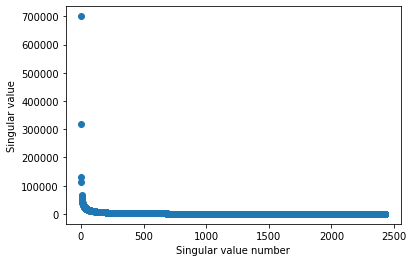

In [64]:
# plot singular values on eigenfaces
plt.figure(1, figsize = (6,4))
#plt.subplot(1,2,1)
plt.scatter(np.arange(1,len(s_crop)+1), s_crop)
plt.xlabel('Singular value number')
plt.ylabel('Singular value')
#plt.subplot(1,2,2)
#plt.semilogy(s_crop)
#plt.xlabel('Singular value number')
#plt.ylabel('Singular value')
plt.show()

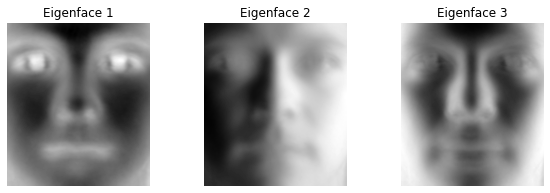

In [65]:
# plot eigenfaces
plt.figure(2, figsize = (10,3))
plt.subplot(1,3,1)
plt.imshow((u_crop[:,0]).reshape(192, 168), cmap = plt.get_cmap("gray"))
plt.title('Eigenface 1')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow((u_crop[:,1]).reshape(192, 168), cmap = plt.get_cmap("gray"))
plt.title('Eigenface 2')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow((u_crop[:,2]).reshape(192, 168), cmap = plt.get_cmap("gray"))
plt.title('Eigenface 3')
plt.axis('off')
plt.show()

(-0.5, 167.5, 191.5, -0.5)

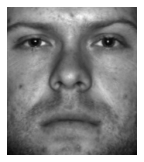

In [63]:
rank = 2000
ur = u_crop[:,0:rank]
sr = np.diag(s_crop[0:rank])
vhr = vh_crop[0:rank, :] #vH, so extract horizontal
faces_approx = np.linalg.multi_dot([ur, sr, vhr])

plt.figure(figsize = (10,6))
plt.subplot(2,3,1)
plt.imshow(faces_approx[:,0].reshape(192,168), cmap = plt.get_cmap("gray"))
#plt.title('Original face')
plt.axis('off')

In [47]:
faces_approx.shape

(32256, 2432)

In [50]:
test = np.reshape(faces_approx[:,0],(192,168))

In [51]:
test.shape

(192, 168)

In [53]:
plt.imshow(test)

(-0.5, 167.5, 191.5, -0.5)

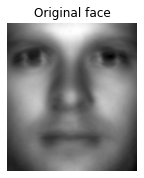